In [1]:
import numpy as np
import pandas as pd
import csv 
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination


/home/fflab/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
heartDisease = pd.read_csv("/home/fflab/Desktop/7-dataset.csv")
heartDisease = heartDisease.replace('?',np.nan)

In [3]:
print('Sample instances from the dataset are given below')
print(heartDisease.head())

Sample instances from the dataset are given below
   age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63       1   1       145   233    1        2      150      0      2.3   
1   67       1   4       160   286    0        2      108      1      1.5   
2   67       1   4       120   229    0        2      129      1      2.6   
3   37       1   3       130   250    0        0      187      0      3.5   
4   41       0   2       130   204    0        2      172      0      1.4   

   slope ca thal  heartdisease  
0      3  0    6             0  
1      2  3    3             2  
2      2  2    7             1  
3      3  0    3             0  
4      1  0    3             0  


In [4]:
print('\n Attributes and datatypes')
print(heartDisease.dtypes)


 Attributes and datatypes
age               int64
gender            int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
thal             object
heartdisease      int64
dtype: object


In [5]:
model= BayesianModel([('age','heartdisease'),('gender','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)


Learning CPD using Maximum likelihood estimators


/home/fflab/.local/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [6]:
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)


 Inferencing with Bayesian Network:


In [7]:
print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)


 1. Probability of HeartDisease given evidence= restecg
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+


/home/fflab/.local/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [8]:
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)


 2. Probability of HeartDisease given evidence= cp 
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdisease(2) |              0.1373 |
+-----------------+---------------------+
| heartdisease(3) |              0.1537 |
+-----------------+---------------------+
| heartdisease(4) |              0.1321 |
+-----------------+---------------------+


NameError: name 'plt' is not defined

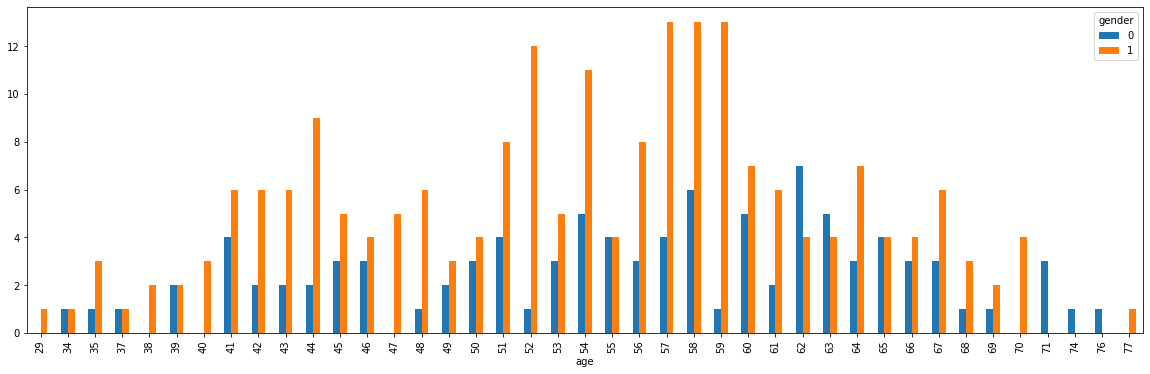

In [27]:
pd.crosstab(heartDisease.age,heartDisease.gender).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

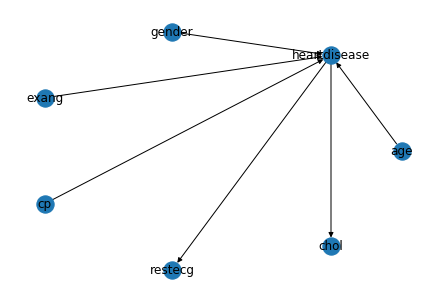

In [32]:
import networkx as nx
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels = True)